## Importing Libraries

In [20]:
import pandas as pd #to perform operations on data
import numpy as np
import matplotlib.pyplot as plt #to visualize data
import seaborn as sns

#### It has been a headache for me to find the right path to put in pd.read_csv(). This helps it solve it.

In [3]:
import os
# find path of file relative to cwd
for root, dirs, files in os.walk("."):
    for file in files:
        if "train.csv" in file:
            print(os.path.join(root, file))


.\Dataset\titanic\train.csv


In [4]:
train = pd.read_csv("./Dataset/titanic/train.csv") # using 'r' before to treats it as literal string with 
test = pd.read_csv(r".\Dataset\titanic\test.csv")   # considering any escape sequence like '\n'. OR i could use '/' instead  of '\'

In [5]:
train.shape #gives shape ( or numbers of record to number of attributes

(891, 12)

In [6]:
train.columns #returns all the attributes

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
train.tail(1) #to get an overview of the dataset

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [8]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [9]:
train.info() #gives basic info regarding the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
train.describe() # gives basic statistic data of the dataset, helps to find outliers, etc.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
train.isnull().sum() # if there exists null values, it returns the total count, column wise

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

##### here ['Age'] has 177 empty values and ['Cabin'] has 687

In [12]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

##### here ['Age'] has 86 empty values and ['Cabin'] has 327

### Visualisation of train data
#### Visualising different metrics

In [14]:
#Seprating numerical and categorical values
num_col = train[['Age','Fare','SibSp','Parch']]
cat_col = train[['Sex','Cabin','Survived','Embarked','Ticket']]

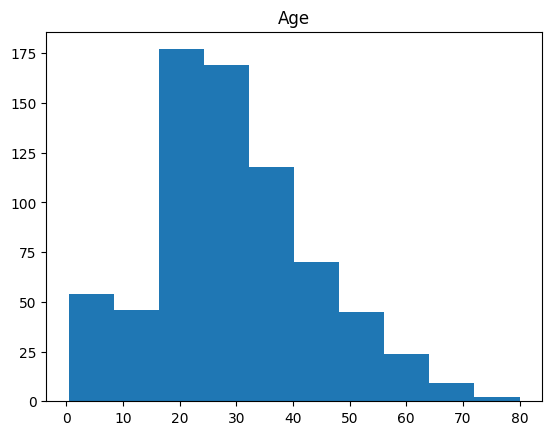

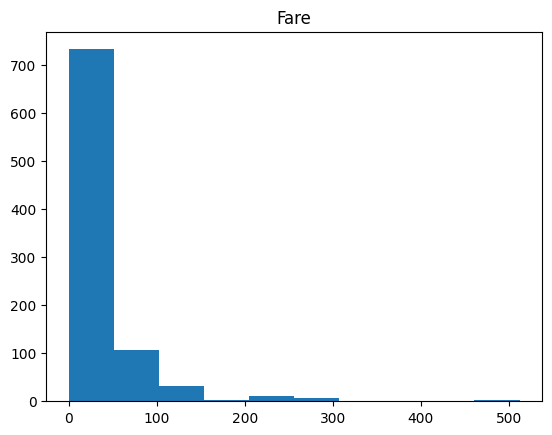

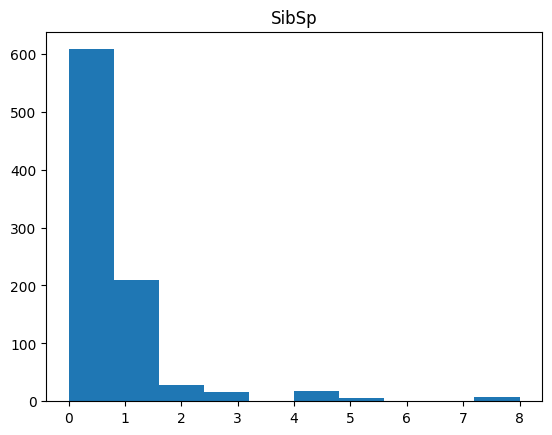

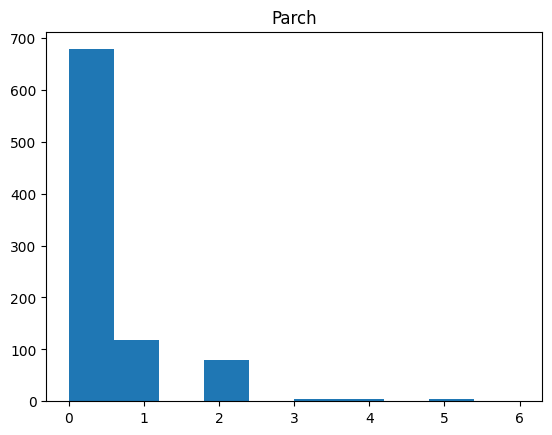

In [19]:
#iterating over num_col and plotting individually
for i in num_col.columns: #used num_col.columns to make it more clear that i am iterating over columns, could have used just num_col
    plt.hist(num_col[i]) # draws hhistogram directly on active figure of matplotlib, no need to store in a variable if not modifying
    plt.title(i)
    plt.show()

#### Visualising categorical values

<Axes: xlabel='Pclass', ylabel='Fare'>

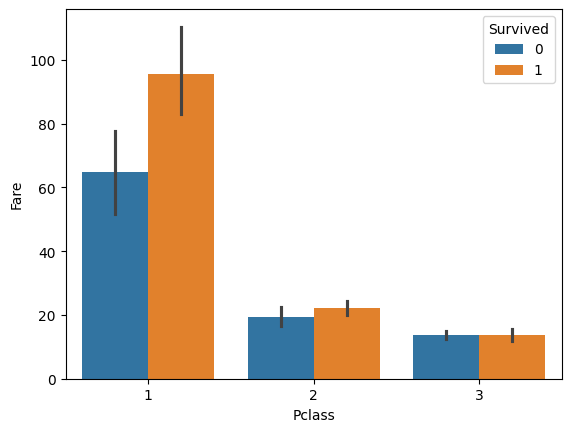

In [23]:
sns.barplot(data = train, x = 'Pclass', y = 'Fare', hue = 'Survived')
# bar plot from seaborn, with data from train, x axis is Passenger Class, y axis is Average fare, and is
# divided by Survived differentiated in color

### Finding Average values based on Survived or not

In [25]:
pd.pivot_table(train, index = 'Survived', values = ['Age', 'Fare', 'Pclass', 'Parch'])

,Age,Fare,Parch,Pclass
Survived,,,,
0,30.626179,22.117887,0.329690,2.531876
1,28.343690,48.395408,0.464912,1.950292


What we get here is, avg of Ages that didnt survived/survived, etc..